# Lab Exercise

## E1. Work and analysis data of students in a university

### Build the data

In [44]:
import pandas as pd
import numpy as np
from numpy import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# create Courses Data Frame
courses_data = {'course_code': ['C101', 'C102', 'C103', 'C104', 'C105'], 
                'course_name': ['Math', 'Physics', 'Chemistry', 'Biology', 'Computer Science'], 
                'credit_hours': [3, 3, 3, 4, 4], 
                'max_total': [100, 100, 100, 150, 150]}
courses = pd.DataFrame(data=courses_data)
courses

,course_code,course_name,credit_hours,max_total
0,C101,Math,3,100
1,C102,Physics,3,100
2,C103,Chemistry,3,100
3,C104,Biology,4,150
4,C105,Computer Science,4,150


In [46]:
# create Students Data Frame
students_data = {'student_code': ['S101', 'S102', 'S103', 'S104', 'S105'], 
                 'student_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']}
students = pd.DataFrame(data=students_data)
students

,student_code,student_name
0,S101,Alice
1,S102,Bob
2,S103,Charlie
3,S104,David
4,S105,Eve


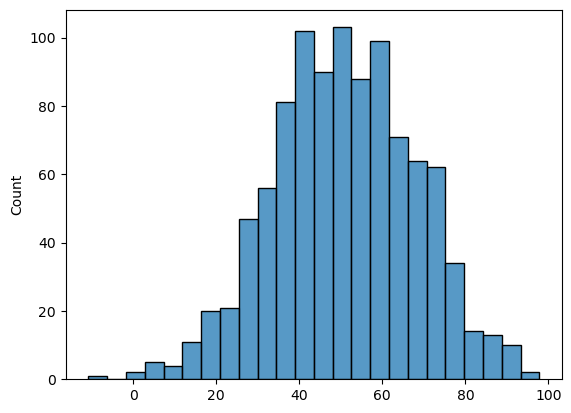

In [47]:
x = random.normal(loc=50, scale=50/3, size=1000)
len(students.index)
sns.histplot(x)
plt.show()

In [48]:
# create Grades Data Frame
grades_data = {'student_code': [], 
               'course_code': [], 
               'total':[]}
grades = pd.DataFrame(data=grades_data)

# Insert random grades
for course in courses.index:
    max_total = courses.loc[course,'max_total']
    random_grades = random.normal(loc=max_total*3/4, scale=max_total/6, size=len(students.index))
    i = 0
    for student in students.index:
#         grades_data['course_code'].append(courses.loc[course,'course_code'])
#         grades_data['student_code'].append(students.loc[student,'student_code'])
#         grades_data['total'].append(random_grades[i])

        grades.loc[len(grades)] = [students.loc[student,'student_code'],
                                   courses.loc[course,'course_code'],
                                   100 if random_grades[i] > 100 else 0 if random_grades[i] < 0 else round(random_grades[i],2)]
        i += 1
        
grades

,student_code,course_code,total
0,S101,C101,72.94
1,S102,C101,36.10
2,S103,C101,99.26
3,S104,C101,93.99
4,S105,C101,76.22
5,S101,C102,78.06
6,S102,C102,50.59
7,S103,C102,66.93
8,S104,C102,88.89
9,S105,C102,88.25


In [49]:
# Add credit hours to grades method1
grades['course_credit_hours'] = 0
for grade in grades.index:
    for course in courses.index:
        if courses.loc[course,'course_code'] == grades.loc[grade,'course_code']:
                grades.loc[grade,'course_credit_hours'] = courses.loc[course,'credit_hours']
                break
# Add credit hours to grades method2
for index,row in grades.iterrows():
    # Don't know why grades.loc[index,'course_credit_hours'] makes error
    grades.iloc[index,grades.shape[1]-1] = courses[courses['course_code'].isin([row['course_code']])].credit_hours
grades

,student_code,course_code,total,course_credit_hours
0,S101,C101,72.94,3
1,S102,C101,36.10,3
2,S103,C101,99.26,3
3,S104,C101,93.99,3
4,S105,C101,76.22,3
5,S101,C102,78.06,3
6,S102,C102,50.59,3
7,S103,C102,66.93,3
8,S104,C102,88.89,3
9,S105,C102,88.25,3


In [50]:
# Add percentage to grades
grades['percentage'] = 0
for grade in grades.index:
    grades.iloc[grade,grades.shape[1]-1] = round(100 * grades.loc[grade,'total'] / courses[courses['course_code'].isin([grades.loc[grade,'course_code']])].max_total,2) 
grades

,student_code,course_code,total,course_credit_hours,percentage
0,S101,C101,72.94,3,72.94
1,S102,C101,36.10,3,36.10
2,S103,C101,99.26,3,99.26
3,S104,C101,93.99,3,93.99
4,S105,C101,76.22,3,76.22
5,S101,C102,78.06,3,78.06
6,S102,C102,50.59,3,50.59
7,S103,C102,66.93,3,66.93
8,S104,C102,88.89,3,88.89
9,S105,C102,88.25,3,88.25


In [51]:
# Create additional columns for gpa and garde_letter# Add percentage to grades
grades['gpa'] = 0
grades['grade'] = 'F'
for grade in grades.index:
    percentage = grades.loc[grade,'percentage']
    if percentage < 60:
        grades.iloc[grade,grades.shape[1]-1] = 'F'
        grades.iloc[grade,grades.shape[1]-2] = 0.0
    elif percentage < 64:
        grades.iloc[grade,grades.shape[1]-1] = 'D'
        grades.iloc[grade,grades.shape[1]-2] = 1.0
    elif percentage < 67:
        grades.iloc[grade,grades.shape[1]-1] = 'D+'
        grades.iloc[grade,grades.shape[1]-2] = 1.3
    elif percentage < 70:
        grades.iloc[grade,grades.shape[1]-1] = 'C-'
        grades.iloc[grade,grades.shape[1]-2] = 1.7
    elif percentage < 73:
        grades.iloc[grade,grades.shape[1]-1] = 'C'
        grades.iloc[grade,grades.shape[1]-2] = 2.0
    elif percentage < 76:
        grades.iloc[grade,grades.shape[1]-1] = 'C+'
        grades.iloc[grade,grades.shape[1]-2] = 2.3
    elif percentage < 80:
        grades.iloc[grade,grades.shape[1]-1] = 'B-'
        grades.iloc[grade,grades.shape[1]-2] = 2.7
    elif percentage < 84:
        grades.iloc[grade,grades.shape[1]-1] = 'B'
        grades.iloc[grade,grades.shape[1]-2] = 3.0
    elif percentage < 89:
        grades.iloc[grade,grades.shape[1]-1] = 'B+'
        grades.iloc[grade,grades.shape[1]-2] = 3.3
    elif percentage < 93:
        grades.iloc[grade,grades.shape[1]-1] = 'A-'
        grades.iloc[grade,grades.shape[1]-2] = 3.7
    elif percentage < 97:
        grades.iloc[grade,grades.shape[1]-1] = 'A'
        grades.iloc[grade,grades.shape[1]-2] = 4.0
    else:
        grades.iloc[grade,grades.shape[1]-1] = 'A+'
        grades.iloc[grade,grades.shape[1]-2] = 4.0    
grades


,student_code,course_code,total,course_credit_hours,percentage,gpa,grade
0,S101,C101,72.94,3,72.94,2.0,C
1,S102,C101,36.10,3,36.10,0.0,F
2,S103,C101,99.26,3,99.26,4.0,A+
3,S104,C101,93.99,3,93.99,4.0,A
4,S105,C101,76.22,3,76.22,2.7,B-
5,S101,C102,78.06,3,78.06,2.7,B-
6,S102,C102,50.59,3,50.59,0.0,F
7,S103,C102,66.93,3,66.93,1.3,D+
8,S104,C102,88.89,3,88.89,3.3,B+
9,S105,C102,88.25,3,88.25,3.3,B+


In [52]:
# get student code as array
code = students[students['student_name'] == 'David'].student_code.values
grades[grades['student_code'].isin(code)]
# Or
grades[grades['student_code']==code[0]]

,student_code,course_code,total,course_credit_hours,percentage,gpa,grade
3,S104,C101,93.99,3,93.99,4.0,A
8,S104,C102,88.89,3,88.89,3.3,B+
13,S104,C103,77.04,3,77.04,2.7,B-
18,S104,C104,98.83,4,65.89,1.3,D+
23,S104,C105,100.00,4,66.67,1.3,D+


In [53]:
# Extract a data frame for all students at given course ordered by their percentage.
course_code = courses[courses['course_name'] == 'Math']['course_code'].values
grades[grades['course_code'].isin(course_code)].sort_values(by = 'percentage',ascending= True )

,student_code,course_code,total,course_credit_hours,percentage,gpa,grade
1,S102,C101,36.10,3,36.10,0.0,F
0,S101,C101,72.94,3,72.94,2.0,C
4,S105,C101,76.22,3,76.22,2.7,B-
3,S104,C101,93.99,3,93.99,4.0,A
2,S103,C101,99.26,3,99.26,4.0,A+


In [54]:
# Build another data frame for students cumulative_credit_hours, cumulative_gpa
cumulatives_data = {'student_code': [],'cumulative_credit_hours': [], 
               'cumulative_gpa': []}
cumulatives = pd.DataFrame(data=cumulatives_data)
for student in students.index:
    student_code = students.loc[student,'student_code']
    cumulative_gpa = grades[grades['student_code'] == student_code]['gpa'].mean()
    hours = grades[grades['student_code'] == student_code]['course_credit_hours'].sum()
    cumulatives.loc[len(cumulatives)] = [student_code, hours, cumulative_gpa]
cumulatives


,student_code,cumulative_credit_hours,cumulative_gpa
0,S101,17,1.86
1,S102,17,1.18
2,S103,17,1.52
3,S104,17,2.52
4,S105,17,1.72


In [55]:
this = grades[['total','percentage']].describe()
this.loc[['min','max', 'mean']]

,total,percentage
min,30.0700,30.0700
max,100.0000,99.2600
mean,82.5408,69.3244


In [56]:
# Method1 Build another data frame for courses max, min and average degree
courses_statistics_data = {'course_code': [],'min_degree':[], 'max_degree': [], 'average_degree':[]}
courses_statistics = pd.DataFrame(courses_statistics_data)
for course in courses['course_code']:
    statistics = grades[grades['course_code'] == course]['total'].aggregate([np.min,np.max,np.mean])
    courses_statistics.loc[len(courses_statistics)] = np.concatenate(([course], statistics.values))
courses_statistics

,course_code,min_degree,max_degree,average_degree
0,C101,36.1,99.26,75.702
1,C102,50.59,88.89,74.54400000000001
2,C103,30.07,86.52,64.192
3,C104,92.5,100.0,98.26599999999999
4,C105,100.0,100.0,100.0


In [57]:
# Method2 Build another data frame for courses max, min and average degree
courses_statistics_data = {'course_code': [],'min_degree':[], 'max_degree': [], 'average_degree':[]}
courses_statistics = pd.DataFrame(courses_statistics_data)
for course in courses['course_code']:
    statistics = grades[grades['course_code'] == course]['total'].describe()[['min','max','mean']]
    courses_statistics.loc[len(courses_statistics)] = np.concatenate(([course], statistics.values))
courses_statistics

,course_code,min_degree,max_degree,average_degree
0,C101,36.1,99.26,75.702
1,C102,50.59,88.89,74.54400000000001
2,C103,30.07,86.52,64.192
3,C104,92.5,100.0,98.26599999999999
4,C105,100.0,100.0,100.0


## E2. Work and analysis data of countries and cities temperature

In [58]:
# Create the Countries DataFrame
countries = pd.DataFrame({
    'country_code': ['1', '2', '3'],
    'country_name': ['USA', 'Canada', 'Mexico']
})

# Create the Cities DataFrame
cities = pd.DataFrame({
    'city_code': ['101', '102', '201', '202', '301', '302'],
    'country_code': ['1', '1', '2', '2', '3', '3'],
    'city_name': ['New York', 'Los Angeles', 'Toronto', 'Vancouver', 'Mexico City', 'Cancun'],
    'average_temperature': [15, 20, 10, 15, 25, 30]
})
cities

,city_code,country_code,city_name,average_temperature
0,101,1,New York,15
1,102,1,Los Angeles,20
2,201,2,Toronto,10
3,202,2,Vancouver,15
4,301,3,Mexico City,25
5,302,3,Cancun,30


##### A cell for Testing append in column and get random from list

In [75]:
# # Test data
# start_date = '2022-01-01 00:00:00'
# end_date = '2022-01-2 23:00:00'
# senor_num = 20
# dates = pd.date_range(start_date, end_date, freq='H')
# temp = pd.DataFrame({'temperature': np.random.normal(row['average_temperature'], 1, 5),
#                      'temp':np.random.normal(20, 1, 5),'temp2':np.random.normal(20, 1, 5) })
# test = pd.DataFrame({'temperature': np.random.normal(row['average_temperature'], 1, 5)})

# # Append to specific column in data Frame
# # temp =temp.append(test,ignore_index=True).fillna(5)
# temp = (pd.concat([temp, test], ignore_index=True)).fillna({'temp':0})

# # Random list from list
# uncalibrated_indices = np.random.choice(range(10), 5, replace=False)
# uncalibrated_indices
# temp.loc[uncalibrated_indices,'temp'] = 70
# items = [np.nan,100 ,150]
# list_of_random_items =np.random.choice(items,100).tolist()
# list_of_random_items


In [70]:
# Create the Readings DataFrame
start_date = '2022-01-01 00:00:00'
end_date = '2022-01-2 23:00:00'
dates = pd.date_range(start_date, end_date, freq='H')
readings = pd.DataFrame({
    'city_code':[],
    'country_code':[],
    'sensor_id': [],
    'temperature':[],
    'date_time': []
})

# old version of filling readings
# for index,row in cities.iterrows():
#     for date in dates:
#         random_temp = np.random.normal(row['average_temperature'], 1, 20)
#         for i in range(0,20):
#             readings.loc[len(readings.index)] = [row['city_code'],row['country_code'],i,random_temp[i],date]

# Fill temperature data
sensors_num = 20
sensor_ids = [str(i).zfill(2) for i in range(1,sensors_num+1)]
for index,row in cities.iterrows():
    for date in dates:
        random_temp = pd.DataFrame({'temperature':np.random.normal(row['average_temperature'], 1, sensors_num),
                                    'sensor_id': sensor_ids})
        readings = (pd.concat([readings, random_temp], ignore_index=True))\
                    .fillna({'city_code': row['city_code'], 'country_code':row['country_code'],
                            'date_time': date})
# Make 1% uncalibrated
num_uncalibrated = int(0.01 * len(readings))
uncalibrated_indices = np.random.choice(range(len(readings)), num_uncalibrated, replace=False)
readings.loc[uncalibrated_indices,'temperature'] = np.random.choice([np.nan,100 ,-150 ],num_uncalibrated) 
readings

,city_code,country_code,sensor_id,temperature,date_time
0,101,1,01,14.985099,2022-01-01 00:00:00
1,101,1,02,14.872317,2022-01-01 00:00:00
2,101,1,03,14.094591,2022-01-01 00:00:00
3,101,1,04,14.712093,2022-01-01 00:00:00
4,101,1,05,15.055279,2022-01-01 00:00:00
...,...,...,...,...,...
5755,302,3,16,31.206121,2022-01-02 23:00:00
5756,302,3,17,30.708368,2022-01-02 23:00:00
5757,302,3,18,30.258447,2022-01-02 23:00:00
5758,302,3,19,28.945791,2022-01-02 23:00:00


In [71]:
# Extract Data Frame with city_code, date_time, average_temprature.
readings.groupby(['city_code','date_time']).mean(['temperature'])

temperature
city_code date_time                       
101       2022-01-01 00:00:00    14.394904
          2022-01-01 01:00:00    15.093651
          2022-01-01 02:00:00    14.844310
          2022-01-01 03:00:00    14.584278
          2022-01-01 04:00:00    14.903248
...                                    ...
302       2022-01-02 19:00:00    29.892662
          2022-01-02 20:00:00    30.134390
          2022-01-02 21:00:00    29.875708
          2022-01-02 22:00:00    29.999219
          2022-01-02 23:00:00    29.704215

[288 rows x 1 columns]

In [72]:
# Extract Data Frame with country_code, average_temprature, min_temprature, max_temprature, date
readings.groupby(['country_code','date_time']).aggregate({'temperature':[np.mean,np.min,np.max]})

temperature                       
                                        mean       amin        amax
country_code date_time                                             
1            2022-01-01 00:00:00   17.228811  12.731090   22.178312
             2022-01-01 01:00:00   17.734011  13.839950   22.680090
             2022-01-01 02:00:00   17.319856  12.124995   21.186758
             2022-01-01 03:00:00   17.433127  12.177608   21.674721
             2022-01-01 04:00:00   17.471091  12.980790   21.742255
...                                      ...        ...         ...
3            2022-01-02 19:00:00   27.489873  23.788864   32.798727
             2022-01-02 20:00:00   27.644694  23.259959   31.943841
             2022-01-02 21:00:00   27.453537  23.096840   31.699274
             2022-01-02 22:00:00   27.522365  23.399147   32.154999
             2022-01-02 23:00:00   29.089541  23.027842  100.000000

[144 rows x 3 columns]

In [73]:
# Suggest a method to determine uncalibrated sensors then recalculate above values after excluding those sensors
# Determine uncalibrated
uncalibrated_loc=  ((readings['temperature'] < -10) |  
                    readings['temperature'].isnull() | 
                    (readings['temperature'] > 50))
indices = readings[uncalibrated_loc].index
# Drop them
readings.drop(indices,inplace=True)

In [74]:
readings.loc[695:710]

,city_code,country_code,sensor_id,temperature,date_time
695,101,1,16,14.678571,2022-01-02 10:00:00
696,101,1,17,14.389660,2022-01-02 10:00:00
697,101,1,18,14.480243,2022-01-02 10:00:00
698,101,1,19,14.745038,2022-01-02 10:00:00
699,101,1,20,14.446826,2022-01-02 10:00:00
700,101,1,01,15.988899,2022-01-02 11:00:00
701,101,1,02,15.215654,2022-01-02 11:00:00
702,101,1,03,14.243075,2022-01-02 11:00:00
703,101,1,04,15.251689,2022-01-02 11:00:00
704,101,1,05,13.019307,2022-01-02 11:00:00
